# Chapter 5: Dimensions: Fractal's, Hausdorff's and Topological

Chapter 5 of the book [PL] <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") written by <i>Jacek Kudrewicz</i> describes how to calculate and understand fractal's dimension.

I want to honor authors of books, papers and code examples which are used by me during my learning. That's why every new notebook will start from the list of literature.

## Bibliography:

#### Base:
* <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") by <i>Jacek Kudrewicz</i>.

#### Additional:

* <b>Fractal dimension</b> - Wikipedia: https://en.wikipedia.org/wiki/Fractal_dimension

## 5.1 Fractal dimension

The dimension known from the euclidean distance is not a proper way to describe a fractal beacuse if you tell someone that your fractal is a 2D figure then your listener still doesn't know anything about it. To overcome this problem <b>fractional dimension</b> concept was introduced by Benoit Mandelbrot. More about history and concept of fractal dimension may be found here: https://en.wikipedia.org/wiki/Fractal_dimension.

For me the most interesting part of this story is related to the <i>Richardson effect</i>. This is easy to catch in general but hard to understand in detail. You never be able to correct measure length of an isle coastline. Additionally your measurement are depended on scale. I think that better will be example but we must find a way to calculte fractal dimension computationally. Then we will return to the Richardson effect and test it on some natural cases and geographic data.

### 5.1.1 Box counting algorithm

Here I've implemented box counting algorithm (https://en.wikipedia.org/wiki/Box_counting and https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension) to retrieve fractal dimension. The first thing to do is to build matrix (image) from the numpy arrays. Then calculate points density at the different scales and then retrieve fractal dimension $ d $ from the equation:

$$ d = \lim_{\epsilon \to 0} \frac{logN({\epsilon})}{log(1/\epsilon)} $$

Known fractal dimensions are:

- Sierpinski Triangle: ~1.58
- von Koch's Star: ~1.26
- Snowflake: ~1.77
- Sierpinski Carpet: ~1.89

I will test algorithm on them all to find how close I can get to these values.

In [1]:
%matplotlib inline
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

In [2]:
def calculate_dimension(array_of_points, normalization_value=100):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + min_x
    fromzero_array[:, 1] = fromzero_array[:, 1] + min_y
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 255
        
    return image

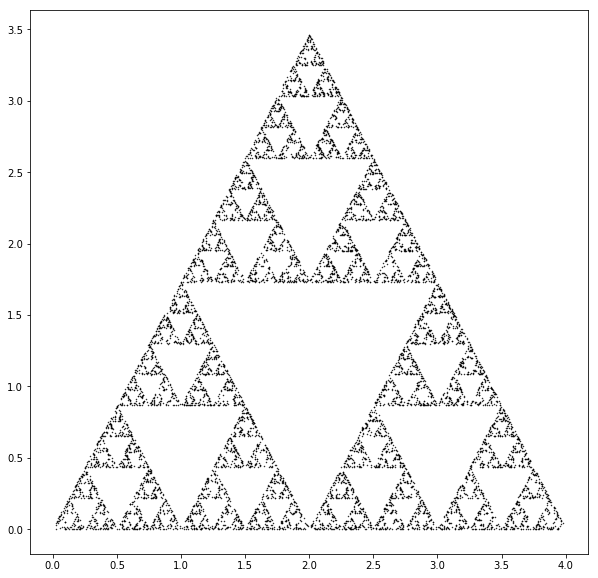

In [3]:
# Test image generation with Sierpinski Triangle

def prepare_triangle(number_of_points=10000):
    L = 0.5
    functions = [1, 2, 3]
    triangle = []
    x = 0.1
    y = 0.1
    for i in range(0, number_of_points):
        choice = np.random.choice(functions)
        nx = L * x
        ny = L * y
        if choice == 1:
            triangle.append([nx, ny])
        elif choice == 2:
            nx = nx + 2
            triangle.append([nx, ny])
        else:
            nx = nx + 1
            ny = ny + np.sqrt(3)
            triangle.append([nx, ny])
        x = nx
        y = ny
    return np.asarray(triangle)

scatter_triangle = prepare_triangle()
plt.figure(figsize=(10,10))
plt.scatter(scatter_triangle[:, 0], scatter_triangle[:, 1], s=0.2, c='black')
plt.show()

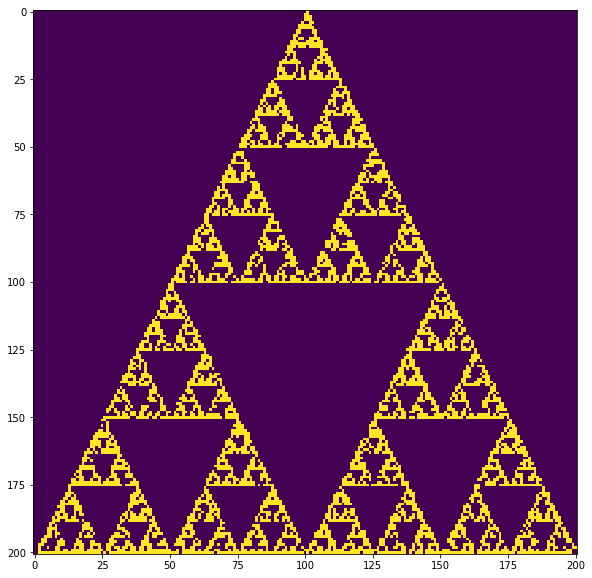

In [4]:
# test1 - image

triangle_image = calculate_dimension(scatter_triangle, 200)
plt.figure(figsize=(10,10))
plt.imshow(triangle_image)
plt.show()

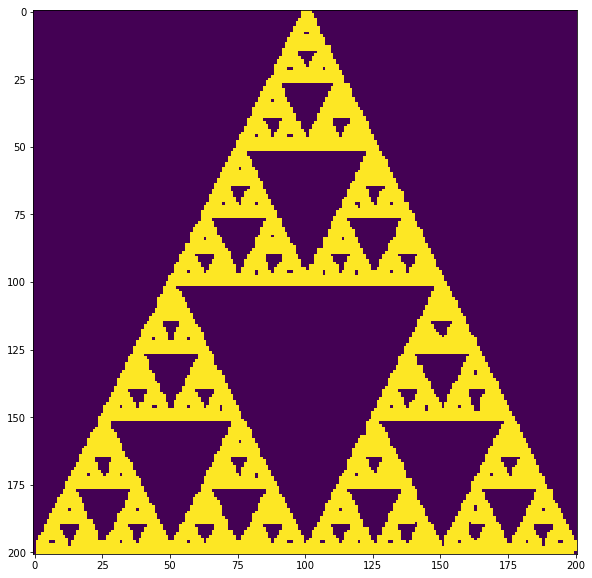

In [5]:
def calculate_dimension(array_of_points, normalization_value=100,
                       dilate=False):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + min_x
    fromzero_array[:, 1] = fromzero_array[:, 1] + min_y
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 1
        
    # 3. Optional: Dilate image
    
    if dilate == True:
        structuring_matrix = np.ones((3, 3), dtype=np.bool)
        dilated_mtx = convolve(image, structuring_matrix)
        dilated_mtx[dilated_mtx > 0] = 1
        
    return dilated_mtx

# test2 - dilated image

triangle_image = calculate_dimension(scatter_triangle, 200, dilate=True)
plt.figure(figsize=(10,10))
plt.imshow(triangle_image)
plt.show()

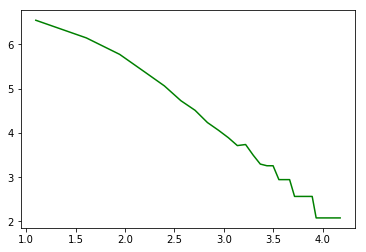

In [6]:
def calculate_dimension(array_of_points, normalization_value=100,
                       dilate=False):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + min_x
    fromzero_array[:, 1] = fromzero_array[:, 1] + min_y
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 1
        
    # 3. Optional: Dilate image
    
    if dilate == True:
        structuring_matrix = np.ones((3, 3), dtype=np.bool)
        image = convolve(image, structuring_matrix)
        image[image > 0] = 1
        
    # 4. Box preparation
    
    box_length = np.arange(3, normalization_value/3, 2, dtype=int)
    
    # 5. Counting edges (number of boxes which covers fractal image). Takes into account
    # a box which covers heterogeneous areas: 
    # https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension
    shape_arr = []
    for border in box_length:
        counter = 0
        i_arr = np.arange(0, image.shape[0], border)

        j_arr = np.arange(0, image.shape[1], border)
            
        for i in i_arr:
            if (i + border) > image.shape[0]:
                pass
            else:
                for j in j_arr:
                    if (j + border) > image.shape[1]:
                        pass
                    else:
                        test = np.mean(image[i:i+border, j:j+border])
                        if (test != 1) and (test != 0):
                            counter = counter + 1
        shape_arr.append([border, counter])
    shape_arr = np.asarray(shape_arr)     
        
    return shape_arr

# test 3 - boxes calculation

triangle_image_boxes = calculate_dimension(scatter_triangle, 200, dilate=True)
plt.figure()
plt.plot(np.log(triangle_image_boxes[:, 0]), np.log(triangle_image_boxes[:, 1]), c='green')
plt.show()

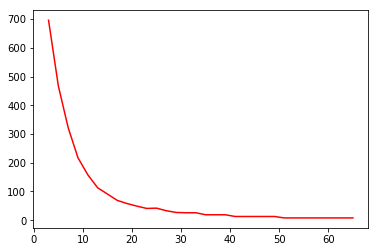

In [7]:
triangle_image_boxes = calculate_dimension(scatter_triangle, 200, dilate=True)
plt.figure()
plt.plot(triangle_image_boxes[:, 0], triangle_image_boxes[:, 1], c='red')
plt.show()

-1.64230182742 8.83813193622


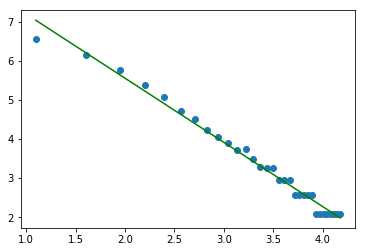

In [10]:
def calculate_dimension(array_of_points, normalization_value=100,
                       dilate=False):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + min_x
    fromzero_array[:, 1] = fromzero_array[:, 1] + min_y
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 1
        
    # 3. Optional: Dilate image
    
    if dilate == True:
        structuring_matrix = np.ones((3, 3), dtype=np.bool)
        image = convolve(image, structuring_matrix)
        image[image > 0] = 1
        
    # 4. Box preparation
    
    box_length = np.arange(3, normalization_value/3, 2, dtype=int)
    
    # 5. Counting edges (number of boxes which covers fractal image). Takes into account
    # a box which covers heterogeneous areas: 
    # https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension
    shape_arr = []
    for border in box_length:
        counter = 0
        i_arr = np.arange(0, image.shape[0], border)

        j_arr = np.arange(0, image.shape[1], border)
            
        for i in i_arr:
            if (i + border) > image.shape[0]:
                pass
            else:
                for j in j_arr:
                    if (j + border) > image.shape[1]:
                        pass
                    else:
                        test = np.mean(image[i:i+border, j:j+border])
                        if (test != 1) and (test != 0):
                            counter = counter + 1
        shape_arr.append([border, counter])
        
    shape_arr = np.asarray(shape_arr)
    shape_arr = np.log(shape_arr)
    x = shape_arr[:, 0]
    A = np.vstack([x, np.ones(len(x))]).T
    y = shape_arr[:, 1]
    m, c = np.linalg.lstsq(A, y)[0]
    print(m, c)
        
    return shape_arr, [m, c]

# test 4 - linear function fit

triangle_image_boxes = calculate_dimension(scatter_triangle, 200, dilate=True)
m = triangle_image_boxes[1][0]
c = triangle_image_boxes[1][1]
plt.figure()
plt.plot(triangle_image_boxes[0][:, 0], triangle_image_boxes[0][:, 1], 'o', label='Base points')
plt.plot(triangle_image_boxes[0][:, 0],
         c + m * triangle_image_boxes[0][:, 0], c='green', label='Derived function')
plt.show()